<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173_Fall2025/blob/main/F25_Class_05_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 5: Natural Language Processing**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 4 Material

* Part 5.1: Introduction to Hugging Face
* Part 5.2: Hugging Face Tokenizers
* **Part 5.3: Hugging Face Datasets**
* Part 5.4: Training Hugging Face models

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


Make sure your GMAIL address is included as the last line in the output above.

## **Hugging Face Tokenizers**

**Hugging Face tokenizers** are essential tools in natural language processing (NLP) that convert text into numerical data, which can be processed by machine learning models. Here's a breakdown of their importance and why they are particularly valuable for computational biologists:

### What are Hugging Face Tokenizers?
1. **Tokenization**: The process of breaking down text into smaller units called tokens. These tokens can be words, subwords, or characters.
2. **Normalization**: Adjusting the text to a standard format, such as lowercasing or removing punctuation.
3. **Encoding**: Converting tokens into numerical representations that models can understand.

### Types of Tokenizers
1. **Word-based Tokenizers**: Split text into words. Simple but can lead to large vocabularies.
2. **Subword Tokenizers**: Break words into smaller units, balancing vocabulary size and representation. Examples include Byte Pair Encoding (BPE) and WordPiece.
3. **Character-based Tokenizers**: Split text into individual characters. Useful for languages with complex morphology.

### Importance for Computational Biologists
1. **Handling Biological Texts**: Biological texts often contain specialized terminology, gene names, and sequences. Tokenizers can effectively process these texts, ensuring accurate representation and analysis.
2. **Data Preprocessing**: Tokenizers help in preparing biological data for machine learning models, enabling tasks like gene sequence analysis, protein structure prediction, and more.
3. **Efficiency**: Subword tokenizers, in particular, can handle rare and complex terms efficiently, reducing the need for extensive vocabularies and improving model performance.
4. **Integration with Models**: Hugging Face tokenizers are designed to work seamlessly with pre-trained models, allowing computational biologists to leverage state-of-the-art NLP techniques for their research.

You can find more detailed information about Hugging Face tokenizers [here](https://huggingface.co/docs/tokenizers/en/index).


Hugging Face Datasets

The Hugging Face hub includes data sets useful for natural language processing (NLP). The Hugging Face library provides functions that allow you to navigate and obtain these data sets. When we access Hugging Face data sets, the data is in a format specific to Hugging Face. In this part, we will explore this format and see how to convert it to Pandas or TensorFlow data.

We begin by installing Hugging Face if needed. It is also essential to install Hugging Face datasets.


In [6]:
# Install Hugging Face

!pip install transformers > /dev/null
!pip install transformers[sentencepiece]  #> /dev/null
!pip install --upgrade datasets  > /dev/null
!pip install huggingface_hub  > /dev/null

### Demostration 1: List Datasets

In Step 1, we create a Hugging Face tokenizer using the `distilbert-base-uncased` as our tokenizer model. It is important to remember that the `distilbert-base-uncased` tokenizer is a **WordPiece** tokenizer. WordPiece tokenizers split words into subword units. They are particularly effective in handling morphological variations and rare words, making them suitable for a wide range of NLP tasks.

In **Exercise 1** we will shift to a **SentencePiece** tokenizer to see how these two tokenizer types differ.

In [8]:
from huggingface_hub import HfApi

# Create an instance of the HfApi class
api = HfApi()

# Get the list of all datasets
all_datasets = list(api.list_datasets())

print(f"Hugging Face hub currently contains {len(all_datasets)} datasets. The first 5 are:")
print("\n".join([dataset.id for dataset in all_datasets[:5]]))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Hugging Face hub currently contains 326559 datasets. The first 5 are:
facebook/natural_reasoning
Congliu/Chinese-DeepSeek-R1-Distill-data-110k
FreedomIntelligence/medical-o1-reasoning-SFT
GeneralReasoning/GeneralThought-195K
KodCode/KodCode-V1


If the code is correct you should see something similar to the following output:

~~~text
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Hugging Face hub currently contains 326559 datasets. The first 5 are:
facebook/natural_reasoning
Congliu/Chinese-DeepSeek-R1-Distill-data-110k
FreedomIntelligence/medical-o1-reasoning-SFT
GeneralReasoning/GeneralThought-195K
KodCode/KodCode-V1
~~~

### Example 1 - Step 2: Tokenize a Sentence

The code in the cell below shows how to tokenize a sentence. For this example, we will use a quotation from Geoffrey Hinton, a pioneer in the field of deep learning:
> "To make a real impact on AI, we need to build systems that can learn from very large amounts of data."
>
This quote emphasizes the importance of data-driven learning in the development and advancement of neural networks and artificial intelligence

In [9]:
# Example 1 - Step 2: Tokenize a sentence

from datasets import load_dataset

emotions = load_dataset("emotion")



README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

If the code is correct, you should see the something similar to the following:

~~~text
{'input_ids': [101, 2000, 2191, 1037, 2613, 4254, 2006, 9932, 1010, 2057, 2342, 2000, 3857, 3001, 2008, 2064, 4553, 2013, 2200, 2312, 8310, 1997, 2951, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
~~~

The result of this tokenization contains two elements:

* **input_ids:** The individual subword indexes, each index uniquely identifies a subword.

* **attention_mask:**  Which values in input_ids are meaningful and not padding. This sentence had no padding, so all elements have an attention mask of "1". Later, we will request the output to be of a fixed length, introducing padding, which always has an attention mask of "0". Though each tokenizer can be implemented differently, the attention mask of a tokenizer is generally either "0" or "1".

Due to subwords and special tokens, the number of tokens may not match the number of words in the source string. We can see the meanings of the individual tokens by converting these IDs back to strings.


A quick scan of the downloaded data set reveals its structure. In this case, Hugging Face already separated the data into training, validation, and test data sets. The training set consists of 16,000 observations, while the test and validation sets contain 2,000 observations. The dataset is a Python dictionary that includes a Dataset object for each of these three divisions. The datasets only contain two columns, the text and the emotion label for each text sample.


In [11]:

emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

You can see a single observation from the training data set here. This observation includes both the text sample and the assigned emotion label. The label is a numeric index representing the assigned emotion.
.

In [12]:
emotions['train'][2]

{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}

If the code is correct, you should see the following output:

~~~text
{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}
~~~


We can display the labels in order of their index labels.


In [13]:
emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


~~~text
{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

 ~~~

Hugging face can provide these data sets in a variety of formats. The following code receives the emotion data set as a Pandas data frame.


In [14]:
import pandas as pd

emotions.set_format(type='pandas')
df = emotions["train"][:]
df[:5]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


If the code is correct, you should see the following table.

We can use the Pandas "apply" function to add the textual label for each observation.


In [15]:
def label_it(row):
  return emotions["train"].features["label"].int2str(row)


df['label_name'] = df["label"].apply(label_it)
df[:5]


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


With the data in Pandas format and textually labeled, we can display a bar chart of the frequency of each of the emotions.

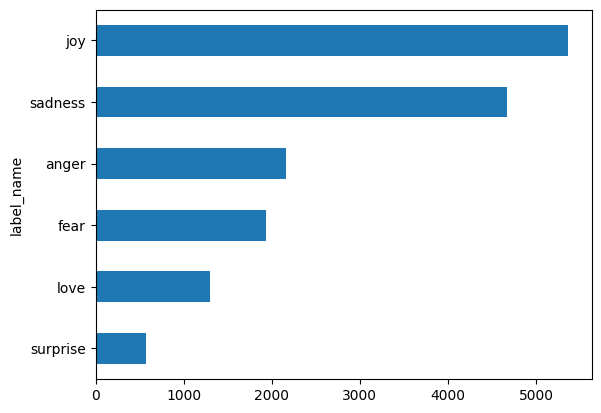

In [16]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.show()


Finally, we utilize Hugging Face tokenizers and data sets together. The following code tokenizes the entire emotion data set. You can see below that the code has transformed the training set into subword tokens that are now ready to be used in conjunction with a transformer for either inference or training.


In [18]:
from transformers import AutoTokenizer


def tokenize(rows):
    return tokenizer(rows['text'], padding=True, truncation=True)


model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

emotions.set_format(type=None)

encoded = tokenize(emotions["train"][:2])

print("**Input IDs**")
for a in encoded.input_ids:
    print(a)


**Input IDs**
[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]


## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_05_3.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**

## **Sol-20**

![__](https://upload.wikimedia.org/wikipedia/commons/5/5e/Processor_Technology_SOL_20_Computer.jpg)


The **Sol-20** was the first fully assembled microcomputer with a built-in keyboard and television output, what would later be known as a home computer. The design was the integration of an Intel 8080-based motherboard, a VDM-1 graphics card, the 3P+S I/O card to drive a keyboard, and circuitry to connect to a cassette deck for program storage. Additional expansion was available via five S-100 bus slots inside the machine. It also included swappable ROMs that the manufacturer called 'personality modules', containing a rudimentary operating system.

The design was originally suggested by Les Solomon, the editor of Popular Electronics. He asked Bob Marsh of Processor Technology if he could design a smart terminal for use with the Altair 8800. Lee Felsenstein, who shared a garage working space with Marsh, had previously designed such a terminal but never built it. Reconsidering the design using modern electronics, they agreed the best solution was to build a complete computer with a terminal program in ROM. Felsenstein suggested the name "Sol" because they were including "the wisdom of Solomon" in the box.

The Sol appeared on the cover of the July 1976 issue of Popular Electronics as a "high-quality intelligent terminal". It was initially offered in three versions; the Sol-PC motherboard in kit form, the Sol-10 without expansion slots, and the Sol-20 with five slots.

A Sol-20 was taken to the Personal Computing Show in Atlantic City in August 1976 where it was a hit, building an order backlog that took a year to fill. Systems began shipping late that year and were dominated by the expandable Sol-20, which sold for \$1,495 in its most basic fully-assembled form. The company also offered schematics for the system for free for those interested in building their own.

The Sol-20 remained in production until 1979, by which point about 12,000 machines had been sold. By that time, the "1977 trinity" —the Apple II, Commodore PET and TRS-80— had begun to take over the market, and a series of failed new product introductions drove Processor Technology into bankruptcy. Felsenstein later developed the successful Osborne 1 computer, using much the same underlying design in a portable format.

### **History**

**Tom Swift Terminal**

Lee Felsenstein was one of the sysops of Community Memory, the first public bulletin board system. Community Memory opened in 1973, running on a SDS 940 mainframe that was accessed through a Teletype Model 33, essentially a computer printer and keyboard, in a record store in Berkeley, California. The cost of running the system was untenable; the teletype normally cost \$1,500 (their first example was donated from Tymshare as junk), the modem another \$300, and time on the SDS was expensive - in 1968, Tymshare charged \$13 per hour (equivalent to \$114 in 2023). Even the reams of paper output from the terminal were too expensive to be practical and the system jammed all the time. The replacement of the Model 33 with a Hazeltine glass terminal helped, but it required constant repairs.

Since 1973, Felsenstein had been looking for ways to lower the cost. One of his earliest designs in the computer field was the Pennywhistle modem, a 300 bits per second acoustic coupler that was the cost of commercial models. When he saw Don Lancaster's TV Typewriter on the cover of the September 1973 Radio Electronics, he began adapting its circuitry as the basis for a design he called the Tom Swift Terminal. The terminal was deliberately designed to allow it to be easily repaired. Combined with the Pennywhistle, users would have a cost-effective way to access Community Memory.

In January 1975, Felsenstein saw a post on Community Memory by Bob Marsh asking if anyone would like to share a garage. Marsh was designing a fancy wood-cased digital clock and needed space to work on it. Felsenstein had previously met Marsh at school and agreed to split the \$175 rent on a garage in Berkeley. Shortly after, Community Memory shut down for the last time, having burned out the relationship with its primary funding source, Project One, as well the energy of its founding members.

**Processor Technology**

January 1975 was also the month that the Altair 8800 appeared on the front page of Popular Electronics, sparking off intense interest among the engineers of the rapidly growing Silicon Valley. Shortly thereafter, on 5 March 1975, Gordon French and Fred Moore held the first meeting of what would become the Homebrew Computer Club. Felsenstein took Marsh to one of the meetings, Marsh saw an opportunity supplying add-on cards for the Altair, and in April, he formed Processor Technology with his friend Gary Ingram.

The new company's first product was a 4 kB DRAM memory card for the Altair. A similar card was already available from the Altair's designers, MITS, but it was almost impossible to get working properly. Marsh began offering Felsenstein contracts to draw schematics or write manuals for the products they planned to introduce. Felsenstein was still working on the terminal as well, and in July, Marsh offered to pay him to develop the video portion. This was essentially a version of the terminal where the data would be supplied by the main memory of the Altair rather than a serial port.

The result was the VDM-1, the first graphics card. The VDM-1 could display 16 lines of 64 characters per line, and included the complete ASCII character set with upper- and lower-case characters and a number of graphics characters like arrows and basic math symbols. An Altair equipped with a VDM-1 for output and Processor Technology's 3P+S card running a keyboard for input removed the need for a terminal, yet cost less than dedicated smart terminals like the Hazeltine.

**Intelligent terminal concept**

Before the VDM-1 was launched in late 1975, the only way to program the Altair was through its front-panel switches and LED lamps, or by purchasing a serial card and using a terminal of some sort. This was typically a Model 33, which still cost \$1,500 if available. Normally the teletypes were not available – Teletype Corporation typically sold them only to large commercial customers, which led to a thriving market for broken-down machines that could be repaired and sold into the microcomputer market. Ed Roberts, who had developed the Altair, eventually arranged a deal with Teletype to supply refurbished Model 33s to MITS customers who had bought an Altair.

Les Solomon, whose Popular Electronics magazine launched the Altair, felt a low-cost smart terminal would be highly desirable in the rapidly expanding microcomputer market. In December 1975, Solomon traveled to Phoenix to meet with Don Lancaster to ask about using his TV Typewriter as a video display in a terminal. Lancaster seemed interested, so Solomon took him to Albuquerque to meet Roberts. The two immediately began arguing when Lancaster criticized the design of the Altair and suggested changes to better support expansion cards, demands that Roberts flatly refused. Any hopes of a partnership disappeared.
